## **Entendimiento del Negocio**

El Ministerio de Transporte de la república de Colombia está realizando un estudio para entender el comportamiento de los habitantes de la ciudad de Bogotá en las vías del país, esto con el fin de tomar las acciones necesarias en búsqueda de la concientización de la ciudadanía. Dentro de estas acciones que se pretende realizar una vez terminado el estudio están: Jornadas de capacitacion y concientización a conductores, verificacion de señalizaciones de transito, entre otras. 

Para realizar este estudio, el ministerio cuenta con un conjunto de datos de accidentalidad, registrado desde el año 2015 hasta el 2019.

### **1. Objetivo del negocio y situación actual**

#### **1.1 Objetivos del negocio**
    
   * Comprender el comportamiento de los habitantes de la ciudad de Bogotá en las vías.
   * Dimensionar el nivel de accidentalidad de la ciudad, así como los tipos de lugares más peligrosos.

#### **1.2 Situación actual** 

La situación actual en cuanto accidentalidad es grave, pues en los ultimos meses se ha dado un incremento considerable de accidentes de tránsito. Por otro lado, actualmente existen unos datos registrados de accidentes desde el año 2015, sin embargo nunca se han estudiado ni se les ha dado un uso provechoso.

### **2. Objetivos del proyecto**


1. Conocer aspectos relevantes sobre los accidentes letales, es decir, aquellos donde hayan heridos o muertos. Localidades mas peligrosas, diseños de lugares, etc.

2. Identificar comportamientos de las personas en estos accidentes, teniendo en cuenta su edad y sexo.

3. Conocer aspectos de los vehiculos implicados en los accidentes de tránsito.

### **3. Planeación del proyecto**
Este proyecto de análisis de datos seguirá la metodología CRISP, el cual nos permite de manera organizada llevar a cabo una serie de fases iterativas, con el fin de tener un resultado satisfactorio al final del estudio. A continuación, se detallan las fases que se van a desarrollar en el proyecto.

#### **1. Fase de Entendimiento de los datos** 

En esta fase vamos a centrarnos en obtener los conjuntos de datos proprcionados por el ministerio, acá vamos a tener en cuenta aspectos como el formato, espacio en memoria y homogeneidad de los datos. Otra activdad importante dentro de la presente fase, es realizar análisis exploratorios sobre los datos, obteniendo información valiosa por medio de la estadística descriptiva y visualización de datos estadísticos.


#### **2. Fase de Preparación de los datos**

Acá vamos a realizar una selección de los atributos que nos interesan en este estudio, verificaremos los tipos de datos y caracterizaremos la información con la que vamos a trabajar. De igual manera, realizaremos una limpieza de datos con el fin de obviar o eliminar algunos valores _outliers_ que puedan darnos problemas en nuestros resultados.

#### **3. Fase de Análisis de datos**

En esta fase nos ayudaremos de la estadistica descriptiva (o inferencial si se llegasde a necesitar) para dar cumplimiento a los objetivos del proyecto.

#### **4. Fase de Evaluación de Resultados y Cumplimiento de Objetivos**

Esta es la ultima fase de la metodología propuesta para el proyecto, aquí se revisarán los resultados y se verificará si, se ha dado cumplimiento a los objetivos establecidos, en caso de que algun objetivo no se haya cumplido por completo, CRISP nos permite retomar de nuevo los análisis en la etapa de Análisis de datos y luego volver a evaluar.

**Nota:** _Los datos usados para el proyecto están disponibles haciendo clic [aquí](https://datosabiertos.bogota.gov.co/dataset/siniestros-viales-consolidados-bogota-d-c/resource/9e3add8e-3f46-42ce-9c0f-419964f6f598)_

# **FASE 1: Entendimiento de los datos**

Para este proyecto se usará el conjunto de datos de _**Siniestros Viales de la ciudad de Bogotá**_, el cual tiene registrado la información de accidentes desde el año 2015 hasta el año 2019.

El formato de la fuente de los datos es Excel, el cual cuenta con 4 hojas, las cuales son: '

* **SINIESTROS**: En esta hoja encontramos la información propia de los accidentes de transito (e.g Tipo de accidente, Fecha, Localidad, entre otros)

* **ACTOR VIAL**: En esta hoja se encuentra la información de las personas implicadas en el accidente (e.g. Sexo, Edad, Estado de la persona), varias personas pueden verse implicada en un mismo accidente.

* **VEHICULOS**: En esta hoja se encuentra la información relacionada a los vehiculos implicados en el accidente de transito (e.g Si el vehiculo es un carro, una moto o un bus. Si el vehiculo se fugó del lugar del accidente o no, entre otros)

* **HIPOTESIS**: Por último, en esta hoja se encuentran registradas algunas psoibles causas del accidente, como por ejemplo, el no respetar un semaforo en rojo, el exceso de velocidad o el desobedecer alguna señal de tránsito.

Para el presente estudio, se usarán las primeras 3 hojas, las cuales nos ofrecen los datos necesarios para el cumplimiento de los objetivos. Dado que este estudio no busca dar algun motivo por el cual un accidente ocurrió, no se ve necesario el uso de los datos presentes en la hoja **HIPOTESIS**.

### Importacion de Liberías

In [ ]:
!pip install seaborn --upgrade

     |████████████████████████████████| 286kB 4.2MB/s 
  Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1


In [ ]:
# Importacion de librerias
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
# Configuramos el estilo GGPLOT para las visualizaciones
#plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
plt.style.use('ggplot')

## **1. Adquisión e Integracion de los datos**
Primero realizamos la adquisión de los datos, para el presente estudio, se tendrán en cuenta las tres primeras hojas: **'SINIESTROS'**, **'ACTORES'** y **'VEHICULOS'**.

Vamos entonces a guardar en la variables `df_siniestros` un dataframe con los datos de los accidentes, en la variable `df_actores` un dataframe con los datos de las personas y en `df_vehiculos` un dataframe con los datos de los vehiuclos implicados.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving accidentalidad_bogota.xlsx to accidentalidad_bogota.xlsx


In [ ]:
#url_datos_accidentes = 'https://datosabiertos.bogota.gov.co/dataset/0b070626-fe5a-42dc-ae99-92601da166d9/resource/9e3add8e-3f46-42ce-9c0f-419964f6f598/download/2015_2019_siniestralidad_vial.xlsx'
import io
df_siniestros = pd.read_excel(io.BytesIO(uploaded['accidentalidad_bogota.xlsx']), sheet_name='SINIESTROS')
df_actores = pd.read_excel(io.BytesIO(uploaded['accidentalidad_bogota.xlsx']), sheet_name='ACTOR_VIAL')
df_vehiculos = pd.read_excel(io.BytesIO(uploaded['accidentalidad_bogota.xlsx']), sheet_name='VEHICULOS')

## **2. Análisis exploratorio de los datos**
Ahora vamos a explorar cada uno de los dataframes que hemos almacenado en la etapa de Adquisión de los datos:


### **Dataframe `df_siniestros`**

  Primero damos un vistazo inicial a estos datos, para conocer los nombres de las columnas, sus tipos de datos, su peso en memoria, la cantidad de filas y valores nulos:


In [ ]:
df_siniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173443 entries, 0 to 173442
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   CODIGO_SINIESTRO  173443 non-null  int64 
 1   FECHA             173443 non-null  object
 2   HORA              173443 non-null  object
 3   GRAVEDAD          173443 non-null  object
 4   CLASE             173443 non-null  object
 5   CHOQUE_CON        147737 non-null  object
 6   OBJETO_FIJO       5514 non-null    object
 7   DIRECCION         173443 non-null  object
 8   TOTAL_MUERTOS     173443 non-null  int64 
 9   TOTAL_HERIDOS     173443 non-null  int64 
 10  LOCALIDAD         173443 non-null  object
 11  DISENO_LUGAR      173443 non-null  object
dtypes: int64(3), object(9)
memory usage: 15.9+ MB


Con lo anterior podemos observar que el dataframe `df_siniestros` cuenta con 173443 filas, posee un total de 11 columnas, de las cuales 3 de ellas son de tipo entero; importante mencionar que la columna **CODIGO_SINIESTRO** solo nos sirve para identificar al accidente, no es relevante para realizar procesos estadisticos como promedios. En almacenamiento en memoria vemos que usa 15.9MB. Y las columnas **OBJETO_FIJO** y **CHOQUE_CON** tienen valores nulos.

Ahora vamos a explorar las estadisticas descriptivas mas comunes de este dataframe usando `describe()`.

In [ ]:
df_siniestros[['TOTAL_MUERTOS', 'TOTAL_HERIDOS']].describe()

,TOTAL_MUERTOS,TOTAL_HERIDOS
count,173443.000000,173443.000000
mean,0.015538,0.471135
std,0.127536,0.975981
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,4.000000,72.000000


Los datos anteriores nos ofrecen una información valiosa acerca de los muertos y heridos. Podemos observar que el **máximo número de heridos es de 72 personas**, mientras que **4 es el máximo número de muertos**. También vemos que los datos tienen una desviación estandar pequeña, para los heridos tenemos un valor de 0.98 aproximadamente, y para los muertos, tenemos un valor de 0.13 aproximadamente, siendo además la media 0.01 para los muertos y 0.47 para los heridos, podemos decir que los datos no están muy dispersos con respecto a su media. Por lo que, si graficamos en un histograma la distribución de estos datos, tendremos una curva, en realizad angosta y la mayoría de los datos concentrados cerca a la media. Otro dato que podemos obtener es el rango, haciendo la resta entre mínimo y máximo, dándonos 68 para esta muestra.

Ahora, revisemos la curtosis de esta muestra, para conocer la forma del pico de la distribución.

In [ ]:
df_siniestros[['TOTAL_MUERTOS', 'TOTAL_HERIDOS']].kurt()

TOTAL_MUERTOS     86.705634
TOTAL_HERIDOS    616.730827
dtype: float64

Esto nos confirma lo que sospechabamos, el metodo `kurt() `de Pandas realiza el cálculo de la curtosis con el coeficiente de Fisher, si este es mayor que cero , nos indica que los datos tienden a estar proximos a la media. El pico de está distribución debería ser angosto.

Si graficamos la distribución de estas variables, tenemos lo siguiente:

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


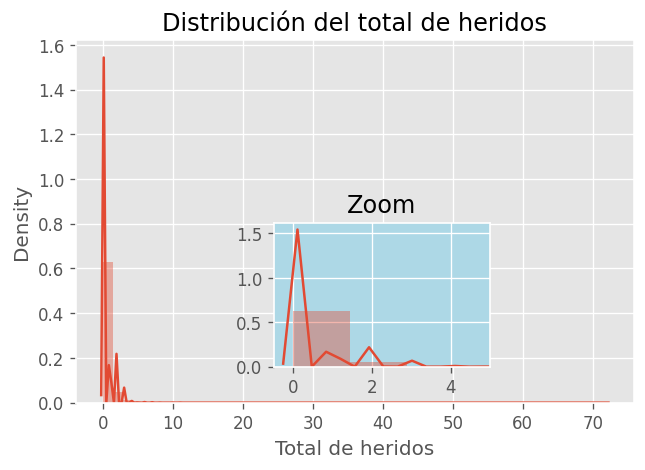

In [ ]:
fig, ax = plt.subplots(dpi=120)
ax.set_title('Distribución del total de heridos')
# Primera grafica, distribucion del total de heridos
sns.distplot(df_siniestros['TOTAL_HERIDOS'], ax=ax)
ax.set_xlabel('Total de heridos')
ax_zoom = fig.add_axes([0.4, 0.2, 0.3, 0.3], facecolor='lightblue')
sns.distplot(df_siniestros['TOTAL_HERIDOS'], ax=ax_zoom)
ax_zoom.set_title('Zoom')
ax_zoom.set_xlim(-0.5, 5.0)
ax_zoom.set_xlabel('')
ax_zoom.set_ylabel('');

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


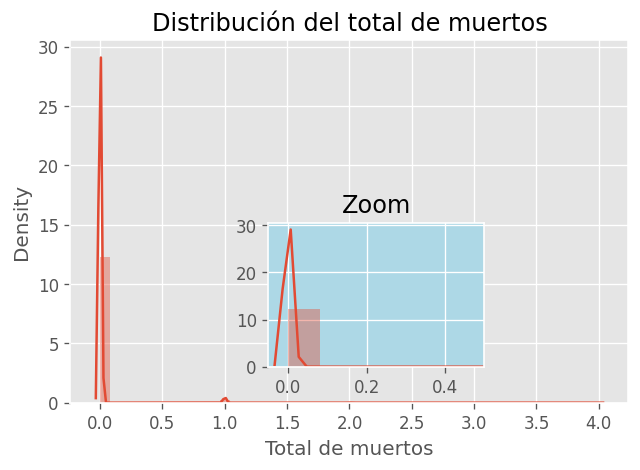

In [ ]:
fig, ax = plt.subplots(dpi=120)
ax.set_title('Distribución del total de muertos')
# Primera grafica, distribucion del total de heridos
sns.distplot(df_siniestros['TOTAL_MUERTOS'], ax=ax)
ax.set_xlabel('Total de muertos')
ax_zoom2 = fig.add_axes([0.4, 0.2, 0.3, 0.3], facecolor='lightblue')
sns.distplot(df_siniestros['TOTAL_MUERTOS'], ax=ax_zoom2)
ax_zoom2.set_title('Zoom')
ax_zoom2.set_xlim(-0.05, 0.5)
ax_zoom2.set_xlabel('')
ax_zoom2.set_ylabel('');

Lo gráfica anterior termina de afirmar nuestros cálculos, los datos del total de muertos y heridos no están muy dispersos y sus valores tienden a ser cercanos a la media.

Por último, miremos la asimetría, definida en pandas con el método `skew() `, nos dice hacia donde tiende la curva de la distribución.

In [ ]:
df_siniestros[['TOTAL_MUERTOS', 'TOTAL_HERIDOS']].skew()

TOTAL_MUERTOS     8.707379
TOTAL_HERIDOS    13.837383
dtype: float64

Este dato nos confirma algo que ya hemos visto en la grafica, las distribuciones tienen una asínmetría positiva. Otro dato que nos gustaría saber es la suma del total de muertos y heridos a través de los años. La calculamos en la siguiente celda.

In [ ]:
df_siniestros[['TOTAL_MUERTOS', 'TOTAL_HERIDOS']].sum()

TOTAL_MUERTOS     2695
TOTAL_HERIDOS    81715
dtype: int64

Por otra parte, debemos conocer los atributos categóricos de este dataframe, para saber qué valores pueden tomar, nos vamos a centrar en los atributos: **GRAVEDAD**, **CLASE**, **CHOQUE_CON**, **OBJETO_FIJO** y **DISENO_LUGAR** para ello haremos uso del método `unique()`

In [ ]:
print(f"GRAVEDAD: {df_siniestros['GRAVEDAD'].unique()}\n")
print(f"CLASE: {df_siniestros['CLASE'].unique()}\n")
print(f"OBJETO_FIJO: {df_siniestros['OBJETO_FIJO'].unique()}\n")
print(f"CHOQUE_CON: {df_siniestros['CHOQUE_CON'].unique()}\n")
print(f"DISENO_LUGAR: {df_siniestros['DISENO_LUGAR'].unique()}\n")


GRAVEDAD: ['Con Heridos' 'Solo Daños' 'Con Muertos']

CLASE: ['Choque' 'Volcamiento' 'Atropello' 'Otro' 'Caida de ocupante'
 'Autolesion' 'Incendio']

OBJETO_FIJO: [nan 'Muro' 'Inmueble' 'Vehiculo estacionado' 'Poste' 'Barandas' 'Arbol'
 'Valla, Señal' 'Otro' 'Tarima, Caseta' 'Semaforo' 'Hidrante']

CHOQUE_CON: ['Vehiculo' nan 'Objeto Fijo' 'Tren' 'Semoviente']

DISENO_LUGAR: ['Interseccion' 'Tramo de Via' 'Paso elevado' 'Lote o predio'
 'Paso inferior' 'Puente' 'Paso a nivel' 'Glorieta' 'Cicloruta'
 'Via peatonal' 'Ponton' 'Tunel' 'Via troncal']



Con base en los procesos realizados anteriormente, podemos caracterizar un poco mejor el conjunto de datos:

| Variable | Definición	| Valores | 
| --- | --- | --- |
| CODIGO_SINIESTRO | Identificador del accidente | |
| FECHA 	| Fecha en la que ocurrio el accidente | |
| HORA 	| Hora en la que ocurrio el accidente 	| |
| GRAVEDAD |	Gravedad del accidente 	| "Solo Daños", "Con Heridos" o "Con muertos" |
| CLASE |	Clase de accidente ocurrido 	| "Choque", "Atropello", "Caida de ocupante", "Volcamiento", "Otro", "Incendio", "Autolesion"|
| CHOQUE_CON |	Hace alución al objeto con el cual se produjo el choque 	| "Vehiculo", 'Objeto Fijo', "Semoviente" o "Tren"  |
| OBJETO_FIJO |	Hace alución a algún objeto fijo con el cual ocurrio el choque | "Vehiculo estacionado", "Poste", "Muro", "Inmueble", "Barandas", "Otro", "Valla, Señal", "Arbol", "Semaforo", "Tarima, Caseta", "Hidrante". |	
| DIRECCION 	| Dirección donde tuvo lugar el accidente | |	
| TOTAL_MUERTOS | Número de muertos totales del accidente | |
| TOTAL_HERIDOS | Número de heridos totales del accidente |	|
| LOCALIDAD |Localidad de Bogotá donde ocurrió el siniestro| |
| DISENO_LUGAR | Descripción del lugar donde ocurrio el accidente|	"Tramo de Via", "Interseccion", "Glorieta", "Lote o predio", "Paso elevado", "Paso inferior", "Puente", "Paso a nivel", "Cicloruta", "Via peatonal", "Tunel", "Ponton" y "Via troncal" |

Lo mismo hacemos para los otros dos Dataframes.

### **Dataframe `df_actores`**

Primero realizamos el vistazo inicial con el método `info()`

In [ ]:
df_actores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374078 entries, 0 to 374077
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CODIGO_SINIESTRO  374078 non-null  int64  
 1   FECHA             374078 non-null  object 
 2   CONDICION         374078 non-null  object 
 3   ESTADO            374078 non-null  object 
 4   EDAD              367491 non-null  float64
 5   SEXO              374078 non-null  object 
 6   VEHICULO          352757 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 20.0+ MB


Vemos que es un dataset mas grande que `df_accidentes`, esto tiene sentido ya que en un mismo accidente pueden verse implicadas varias personas, con el análisis exploratorio hecho anteriormente, vimos que en un solo accidente se vieron implicados 72 personas heridas. 

En total tenemos 374078 filas, con 6 columnas, de las cuales dos son variables numéricas, **CODIGO_SINIESTRO** y **EDAD**. El resto, son variables categóricas. También, podemos observar que las columnas **EDAD** y **VEHICULO** presentan valores nulos.

Ahora vamos a usar `describe()` para obtener las estadisticas mas comunes.

In [ ]:
df_actores[['EDAD']].describe()

,EDAD
count,367491.000000
mean,37.834722
std,14.261490
min,-2.000000
25%,27.000000
50%,36.000000
75%,47.000000
max,120.000000


Con lo anterior, podemos llegar a algunas conclusiones: Hay **algunos outliers como -2** (no pueden haber edades negativas), y tal vez 120, que debemos ir a revisar antes de algun proceso de correlación, por ejemplo. **El promedio de edades está en los 37 años aproximandamente**, la mitad de las personas que se vieron implicadas en accidentes de transito entre 2015 y 2019 tenian al rededor de 36 años, esto nos lo dice el Cuartil 2.

También podemos ver que la desviación estándar es mucho mayor a cero, lo que nos dice que **los datos están algo dispersos**, por último miremos la curtosis, para conocer el ancho de la curva o pico de las edades.

In [ ]:
df_actores['EDAD'].kurt()

0.715000341514263

La curtosis nos dio un valor levemente mayor a 0, lo que indica que **los datos NO están concentrados en la media**, tendremos una curva mas abierta, la curva debería formar ***casi*** una distribución normal. Si graficamos la distribución podemos entonces, darnos cuenta de nuestros cálculos.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


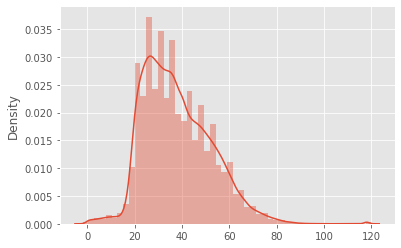

In [ ]:
sns.distplot(x=df_actores['EDAD'])

Ahora vamos a revisar en detalle los atributos categóricos, con el fin de averiguar que valores pueden tomar, para ello vamos a hacer uso de nuevo del método `unique()`. Vamos a ejecutar este metodo con los atributos categóricos **'CONDICION'**, **'ESTADO'** y **'SEXO'**

In [ ]:
print(f"CONDICION: {df_actores['CONDICION'].unique()}\n")
print(f"ESTADO: {df_actores['ESTADO'].unique()}\n")
print(f"SEXO: {df_actores['SEXO'].unique()}\n")

CONDICION: ['CONDUCTOR' 'PEATON' 'PASAJERO' 'MOTOCICLISTA' 'CICLISTA']

ESTADO: ['ILESO' 'HERIDO' 'SIN INFORMACION' 'MUERTO']

SEXO: ['MASCULINO' 'FEMENINO' 'SIN INFORMACION']



Ahora, queremos ver la cantidad de apariciones de los valores anteriormente mencionados, para ello hacemos uso del método `value_counts()`

In [ ]:
df_actores['CONDICION'].value_counts()

CONDUCTOR       273024
MOTOCICLISTA     45066
PASAJERO         24369
PEATON           21321
CICLISTA         10298
Name: CONDICION, dtype: int64

In [ ]:
df_actores['ESTADO'].value_counts()

ILESO              287582
HERIDO              81448
MUERTO               2697
SIN INFORMACION      2351
Name: ESTADO, dtype: int64

In [ ]:
df_actores['SEXO'].value_counts()

MASCULINO          308236
FEMENINO            57525
SIN INFORMACION      8317
Name: SEXO, dtype: int64

Con base en los procesos realizados anteriormente, podemos caracterizar mucho mejor el conjunto de datos:

| Variable | Definición	| Valores | 
| --- | --- | --- |
| CODIGO SINIESTRO | Codigo que idengtifica al siniestro|| |FECHA| Fecha en la cual se registró el sinisestro||
| CONDICION| Rol que cumple la persona en el accidente|'CONDUCTOR' 'PEATON' 'PASAJERO' 'MOTOCICLISTA' 'CICLISTA' |
| ESTADO | Estado de salud de la persona luego del accidente | 'ILESO' 'HERIDO' 'SIN INFORMACION' 'MUERTO' |
| EDAD | Edad de la persona implicada en el siniestro| |
| SEXO | Sexo de la persona implicada| 'MASCULINO' 'FEMENINO' 'SIN INFORMACION'|
| VEHICULO | Identificador del vehiculo | |

### **Dataframe `df_vehiculos`**

Siguiendo con nuestro analísis exploratorio, queda por revisar el dataframe df_vehiculos. Primero realizamos el vistazo general con el método `info()`.

In [ ]:
df_vehiculos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328390 entries, 0 to 328389
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   CODIGO_SINIESTRO  328390 non-null  int64 
 1   FECHA             328390 non-null  object
 2   VEHICULO          328390 non-null  object
 3   CLASE             326355 non-null  object
 4   SERVICIO          316038 non-null  object
 5   ENFUGA            328390 non-null  object
dtypes: int64(1), object(5)
memory usage: 15.0+ MB


Con lo anterior, podemos ver que hay un total de 328390 filas, de igual forma podemos decir que estos datos tienen sentido, puesto que en un Siniestro pueden verse implicados mas de un vehículo. Los atributos CLASE y SERVICIO son los unico con valores faltantes, además podemos observar que todos los atributos de este conjunto de datos son categóricos.

Miremos mas de cerca los atributos categóricos de este dataframe, en especial **CLASE**, **SERVICIO** y ENFUGA.

In [ ]:
print(f"CLASE: {df_vehiculos['CLASE'].unique()}\n")
print(f"SERVICIO: {df_vehiculos['SERVICIO'].unique()}\n")
print(f"ENFUGA: {df_vehiculos['ENFUGA'].unique()}\n")

CLASE: ['Microbus' 'Motocicleta' 'Bus' 'Automovil' 'Campero' 'Camioneta'
 'Bicicleta' 'Camion, Furgon' 'Volqueta' 'Tractocamion' nan 'Buseta'
 'Motocarro' 'Motociclo' 'Cuatrimoto']

SERVICIO: ['Publico' 'Particular' 'Oficial' nan 'Diplomatico']

ENFUGA: ['N' 'S']



Ahora miremos la cantidad de apariciones de las variables categóricas anteriores.

In [ ]:
df_vehiculos['CLASE'].value_counts()

Automovil         136721
Camioneta          45250
Motocicleta        45066
Bus                34206
Camion, Furgon     17948
Campero            14349
Bicicleta          10329
Microbus            9546
Buseta              5027
Tractocamion        4570
Volqueta            3259
Motocarro             76
Motociclo              5
Cuatrimoto             3
Name: CLASE, dtype: int64

In [ ]:
df_vehiculos['SERVICIO'].value_counts()

Particular     178634
Publico        128881
Oficial          8442
Diplomatico        81
Name: SERVICIO, dtype: int64

In [ ]:
df_vehiculos['ENFUGA'].value_counts()

N    324082
S      4308
Name: ENFUGA, dtype: int64

Ahora, podemos caracterizar de una mejor manera los datos de este dataframe, así:

| Variable | Definición	| Valores | 
| --- | --- | --- |
|CODIGO_SINIESTRO| Identificador del siniestro| |
| FECHA | Fecha en la que ocurrió el siniestro| |
| VEHICULO| Vehiculo implicado en el accidente| |
| CLASE | Clase de vehículo que se vio implicado| 'Microbus' 'Motocicleta' 'Bus' 'Automovil' 'Campero' 'Camioneta' 'Bicicleta' 'Camion, Furgon' 'Volqueta' 'Tractocamion' 'Buseta' 'Motocarro' 'Motociclo' 'Cuatrimoto' |
| SERVICIO |Servicio que prestaba el carro| 'Publico' 'Particular' 'Oficial' 'Diplomatico' |
| ENFUGA| Nos dice si el carro se dió a la fuga despupes del accidente o no| 'N' 'S' |

# **FASE 2: Preparación de los datos**

### **1. Limpieza de los datos**


Con base en el análisis exploratorio que se realizó en la etapa anterior, solamente vamos a tener en cuenta las edades de 0 en adelante, siendo cero los recién nacidos. Además, no vamos a tener en cuenta aquellos registros que no tenga información de sexo, se hace necesario para el cumplimiento de los objetivos poder caracterizar a las personas de acuerdo a esta variable para encontrar comportamientos de los hombres y mujeres en las vías más adelante. Para finalizar, excluimos las personas que hayan salido ilesas de los accidentes, ya que según los objetivos del proyecto, nos interesan aquellos accidentes que temrinaron con alguna persona herida o fallecida.

In [ ]:
df_actores_limpio = df_actores[~(df_actores['SEXO'] == 'SIN INFORMACION') & (df_actores['EDAD'] >= 0) & ~(df_actores['ESTADO'] == 'ILESO')]
df_actores_limpio.sample(10)

,CODIGO_SINIESTRO,FECHA,CONDICION,ESTADO,EDAD,SEXO,VEHICULO
171628,4482461,22/05/2017,MOTOCICLISTA,HERIDO,47.0,MASCULINO,4482461-2
359943,10500805,23/10/2019,MOTOCICLISTA,HERIDO,25.0,MASCULINO,10500805-1
308618,10476588,23/02/2019,CICLISTA,HERIDO,24.0,MASCULINO,10476588-2
372163,10506365,20/12/2019,PASAJERO,HERIDO,49.0,FEMENINO,10506365-1
51184,4425548,02/10/2015,PASAJERO,HERIDO,27.0,MASCULINO,4425548-4
319229,10481525,11/04/2019,PEATON,HERIDO,21.0,MASCULINO,NaN
30168,4415455,12/06/2015,MOTOCICLISTA,HERIDO,21.0,MASCULINO,4415455-2
340443,10491560,23/07/2019,MOTOCICLISTA,HERIDO,21.0,MASCULINO,10491560-1
326724,10484966,18/05/2019,MOTOCICLISTA,MUERTO,29.0,MASCULINO,10484966-1
18187,4409836,12/04/2015,PASAJERO,HERIDO,46.0,FEMENINO,4409836-1


Para conocer el nivel de accidentalidad de la capital, se tomarán solo los siniestros en los cuales se hayan visto implicados heridos o muertos. Ya que, de acuerdo a los objetivos del proyecto nos interesa los accidentes letales, es decir, donde se vio implicado la muerte o estropeo de alguna persona.

In [ ]:
df_siniestros_limpio = df_siniestros[
    ~((df_siniestros['TOTAL_MUERTOS'] == 0) & (df_siniestros['TOTAL_HERIDOS'] == 0))
]
len(df_siniestros_limpio)

59238

Para el dataframe `df_vehiculos` no se ve necesario limpiar, puesto que tenemos unos datos precisos y siguiendo de la mano con los objetivos, estos no hacen referencia a alguno en particular, por lo que vamos a estudiar todo el conjunto de datos.

### **2. Selección de características**
Vamos a eliminar la columna **FECHA**, ya que es un dato que tenemos repetido en los tres dataframes del estudio, esta fecha hace referencia al dia del accidente. Vamos a eliminar esta caracteristica en los dataframes `df_actores_limpio` y `df_vehiculos`.

In [ ]:
#df_actores_limpio.drop(columns='FECHA', inplace=True)
#df_vehiculos.drop(columns='FECHA', inplace=True)

### **3. Preporocesamiento y transformación**

Vamos a realizar una serie de transformaciones al dataframe `df_siniestros_limpio`, en búsqueda de poder clasificar información de acuerdo a los años, con el fin de ayudar en el cumplimiento del primer objetivo, el cual nnos dice que neceitamos dimensionar como ha evolucionado Bogotá en materia de accidentalidad.

Primero creamos una columna ANIO_SINIESTRO, en el cual tendremos el dato del año en el cual ocurrio el accidente.

In [ ]:
# Primero hacemos una transformacion al tipo de dato datetime.
df_siniestros_limpio['FECHA'] = pd.to_datetime(df_siniestros_limpio['FECHA'], format='%d/%m/%Y', errors='coerce')
df_siniestros_limpio['ANIO_SINIESTRO'] = df_siniestros_limpio['FECHA'].dt.year
df_siniestros_limpio['ANIO_SINIESTRO'].unique() # array([2015, 2016, 2017, 2018, 2019])

df_actores_limpio['FECHA'] = pd.to_datetime(df_actores_limpio['FECHA'], format='%d/%m/%Y', errors='coerce')
df_actores_limpio['ANIO_SINIESTRO'] = df_actores_limpio['FECHA'].dt.year
df_actores_limpio['ANIO_SINIESTRO'].unique() # array([2015, 2016, 2017, 2018, 2019])

df_vehiculos['FECHA'] = pd.to_datetime(df_actores_limpio['FECHA'], format='%d/%m/%Y', errors='coerce')
df_vehiculos['ANIO_SINIESTRO'] = df_actores_limpio['FECHA'].dt.year
df_vehiculos['ANIO_SINIESTRO'].unique() # array([2015, 2016, 2017, 2018, 2019])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

array([  nan, 2015., 2016., 2017., 2018., 2019.])

# **FASE 3: Análisis de datos**

Luego de haber explorado y preparado los datos que vamos a estudiar, queremos realizar algunos análisis usando estadística descriptiva, con el fin de obtener una mayor información, que nos permita dar solución a los objetivos planetados en el presente proyecto.

### **Comportamiento de los ciudadanos en las vías de Bogotá**

Con base en los objetivos del proyecto, se desea saber el comportamiento de los habitantes de Bogotá en los accidentes. Obtengamos los numeros de hombres y mujeres implicados en accidentes de tránsito. Para ello se hace uso de una tabla de contingencia que relaciona el año del accidente con el sexo y estado de la persona.

In [ ]:
accidentes_por_sexo = pd.crosstab(df_actores_limpio['ANIO_SINIESTRO'], df_actores_limpio['SEXO'], normalize='index')
accidentes_por_sexo

SEXO,FEMENINO,MASCULINO
ANIO_SINIESTRO,,
2015,0.360833,0.639167
2016,0.353172,0.646828
2017,0.361970,0.638030
2018,0.347566,0.652434
2019,0.367544,0.632456


Con esta tabla de frecuencias podemos llegar a varias conclusiones. A lo largo de los cinco años siempre fue mayor el número de hombres que se vieron implicados en accidentes de tránsito en comparación a las mujeres, según la tabla de contingencia, aproximadamente el 35% fueron mujeres y el 65% fueron hombres. Sería aconsejable realizar campañas de concientización mayoritariamente a los hombres, pues son ellos los actores principales (sean victimas o causales) de los accidentes de tránsito en Bogotá.

Ahora, vamos a aveirguar la proprción de muertos y heridos entre hombres y mujeres. Para ello hacemos uso de una tabla de contingencia que nos relacione el sexo, el estado y el año en que ocurrieron los siniestros.

In [ ]:
accidentados_por_anio = pd.crosstab(df_actores_limpio['ANIO_SINIESTRO'], [df_actores_limpio['SEXO'], df_actores_limpio['ESTADO']])
accidentados_por_anio


SEXO           FEMENINO                        MASCULINO                       
ESTADO           HERIDO MUERTO SIN INFORMACION    HERIDO MUERTO SIN INFORMACION
ANIO_SINIESTRO                                                                 
2015               5270    101               0      9127    382               5
2016               5099    116               1      9127    423               3
2017               5421    106               1      9322    413               9
2018               6593     98               0     12175    384               1
2019               6836    115               0     11597    364               0

In [ ]:
accidentados_por_anio = pd.crosstab(df_actores_limpio['ANIO_SINIESTRO'], [df_actores_limpio['SEXO'], df_actores_limpio['ESTADO']], normalize='index')
accidentados_por_anio

SEXO            FEMENINO            ... MASCULINO                
ESTADO            HERIDO    MUERTO  ...    MUERTO SIN INFORMACION
ANIO_SINIESTRO                      ...                          
2015            0.354048  0.006785  ...  0.025663        0.000336
2016            0.345250  0.007854  ...  0.028641        0.000203
2017            0.354963  0.006941  ...  0.027043        0.000589
2018            0.342476  0.005091  ...  0.019947        0.000052
2019            0.361464  0.006081  ...  0.019247        0.000000

[5 rows x 6 columns]

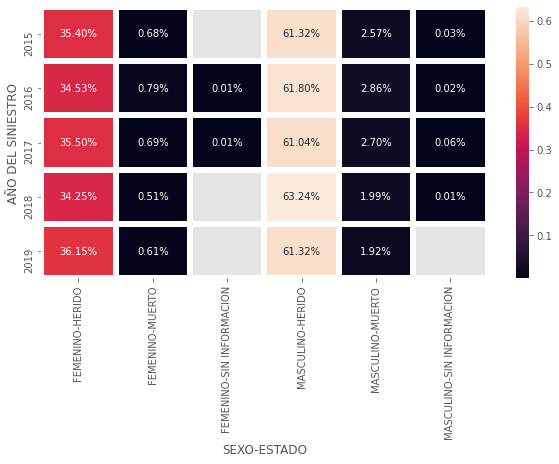

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
mascara = accidentados_por_anio == 0
a = sns.heatmap(accidentados_por_anio, linewidths=5, fmt='.2%', annot=True, mask=mascara, ax=ax)
a.set_ylabel('AÑO DEL SINIESTRO');

Vemos que a través de los 5 años, hay una mayor proporción de hombres heridos que de mujeres, casi el doble de hombres salieron heridos en accidentes de tránsito con respecto a las mujeres. En el ultimo año 2019, el 36% de las mujeres resultaron heridas (siendo este el año donde más mujeres fallecieron en comparación a los otros), versus un 61% de hombres. En el año 2018 se vio un incremento del 2% en la cantidad de hombres heridos con respecto a los otro años, llegando a un total de 12175.

En materia de fallecimientos los hombres tambien van por delante, se puede decir que por cada mujer que fallece en un accidente de tránsito, mueren tres hombres. En el año 2016, fue donde se registró la mayor cantidad de muertes de hombres con 423 fallecidos equivalente a un 2.86%.

Continuando con el comportamiento de los ciudadanos, queremos saber la edad de las personas que se ven implicadas en accidentes de tránsito, para ello vamos a usar una tabla de contingencia que relaciones el sexo, el estado del actor y me dé un promedio de las edades.

In [ ]:
promedio_edades_sexo = pd.crosstab(df_actores_limpio['ANIO_SINIESTRO'], [df_actores_limpio['SEXO'], df_actores_limpio['ESTADO']], aggfunc=np.mean, values=df_actores_limpio['EDAD'])
promedio_edades_sexo

SEXO             FEMENINO             ...  MASCULINO                
ESTADO             HERIDO     MUERTO  ...     MUERTO SIN INFORMACION
ANIO_SINIESTRO                        ...                           
2015            35.407590  45.366337  ...  42.028796       45.000000
2016            36.101981  44.405172  ...  40.513002       48.000000
2017            35.723298  45.415094  ...  42.246973       38.222222
2018            36.056120  48.244898  ...  43.679688       38.000000
2019            35.283645  43.817391  ...  40.173077             NaN

[5 rows x 6 columns]

Con los datos anteriores, nos damos cuenta que en promedio, los hombres que mueren en los accidentes de tránsito son aproximadamente 4 años mas jovenes que las mujeres, de igual manera los heridos, donde los hombres son aproximadamente 3 años más jovenes que ellas. 

In [ ]:
def get_intervalo_confianza_edad(sexo, estado, alpha=0.05):
  datos_a_evaluar = df_actores_limpio[(df_actores_limpio['SEXO'] == sexo) & (df_actores_limpio['ESTADO'] == estado)]
  limite_superior, limite_inferior = sm.stats.DescrStatsW(datos_a_evaluar.EDAD).zconfint_mean(alpha = 0.05)
  return (limite_superior, limite_inferior)

print(get_intervalo_confianza_edad('MASCULINO', 'MUERTO'))
#limite_superior, limite_inferior = sm.stats.DescrStatsW([mujeres_muertas_edades.EDAD]).zconfint_mean(mujeres_muertas_edades.EDAD)

(40.78194912826623, 42.67278128882432)


Ahora queremos saber en donde se concentran las edades de los actores segun su estado. Para ello graficamos el diagrama de violín que vemos en la celda siguiente, recordemos que la barra negra de la mitad nos dice el intervalo de confianza del 95%. Con el grafico nos podemos dar cuenta que aproximadamente los hombres entre los 20 y los 40 años, tienen mayor riesgo de salir heridos en los accidentes, mientras que las mujeres van desde los 20 años hasta los 50 años aproximadamente.

En cuanto a fallecimientos, los hombres qie tienen entre 22 y 58 años tienen mas riesgo de morir en accidentes, para las mujeres este rango de edad va desde los 22 hasta los 65 años aproximadamente.

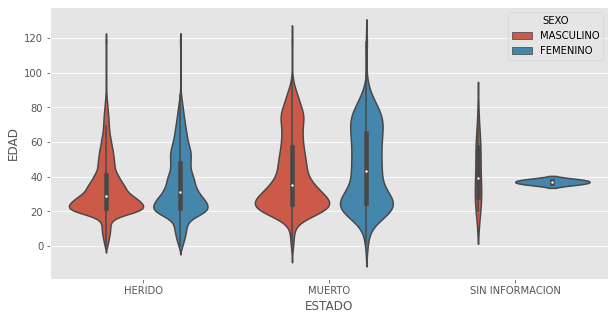

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
distribucion_por_estado = sns.violinplot(ax = ax, data=df_actores_limpio, x='ESTADO', y='EDAD', hue='SEXO');

In [ ]:
accidentes_por_anio = df_siniestros_limpio.groupby('ANIO_SINIESTRO')[['CODIGO_SINIESTRO', 'TOTAL_MUERTOS', 'TOTAL_HERIDOS']].agg(
    {'CODIGO_SINIESTRO': pd.Series.count, 'TOTAL_MUERTOS': np.sum, 'TOTAL_HERIDOS': np.sum}
).rename(columns={'CODIGO_SINIESTRO': 'CANTIDAD_SINIESTRO'})
accidentes_por_anio

,CANTIDAD_SINIESTRO,TOTAL_MUERTOS,TOTAL_HERIDOS
ANIO_SINIESTRO,,,
2015,11256,540,14801
2016,11127,590,14521
2017,10923,542,15022
2018,13067,516,18902
2019,12865,507,18469


### Lugares mas peligrosos y Localidades con mas accidentes

Siguiendo con el cumplimiento de objetivos, ahora vamos a fijarnos en los tipos de lugar donde ocurrieron los siniestros, obteniendo los tipos de lugares más peligrosos, para ello vamos a realizar una tabla de contingenia donde obtenemos la proporción de peligrosidad de los sitios de acuerdo al números de heridos y muertos.

In [ ]:
# Seleccionamos los datos donde hubo muertos
actores_muertos = df_siniestros_limpio[df_siniestros_limpio['TOTAL_MUERTOS'] > 0]
muertos_diseno_lugar = pd.crosstab(actores_muertos['TOTAL_MUERTOS'], actores_muertos['DISENO_LUGAR'], margins=True, normalize=True)
muertos_diseno_lugar

DISENO_LUGAR,Cicloruta,Glorieta,Interseccion,Lote o predio,Paso a nivel,Paso elevado,Paso inferior,Puente,Tramo de Via,Via peatonal,All
TOTAL_MUERTOS,,,,,,,,,,,
1,0.000763,0.003053,0.13626,0.008779,0.001145,0.008397,0.003053,0.001145,0.811069,0.000382,0.974046
2,0.000000,0.000000,0.00458,0.000382,0.000000,0.000000,0.000000,0.000000,0.019084,0.000000,0.024046
3,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001145,0.000000,0.001145
4,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000763,0.000000,0.000763
All,0.000763,0.003053,0.14084,0.009160,0.001145,0.008397,0.003053,0.001145,0.832061,0.000382,1.000000


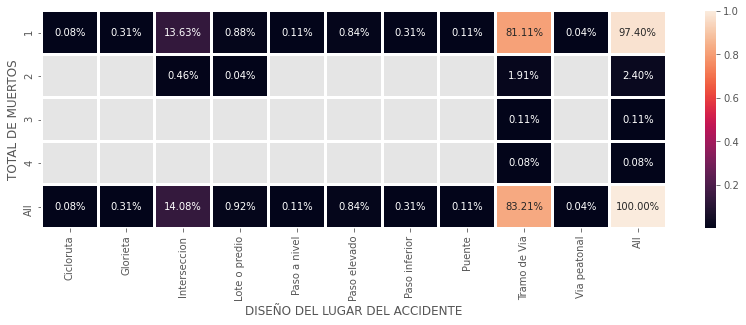

In [ ]:
fig, ax = plt.subplots(figsize=(14, 4))
mask = muertos_diseno_lugar == 0
sns.heatmap(muertos_diseno_lugar, fmt='.2%',ax=ax, mask=mask, annot=True, linewidths=2);
ax.set_ylabel('TOTAL DE MUERTOS')
ax.set_xlabel('DISEÑO DEL LUGAR DEL ACCIDENTE');

In [ ]:
actores_heridos = df_siniestros_limpio[df_siniestros_limpio['TOTAL_HERIDOS'] > 0]
heridos_diseno_lugar = pd.crosstab(actores_heridos['TOTAL_HERIDOS'], actores_heridos['DISENO_LUGAR'], margins=True)
heridos_diseno_lugar

DISENO_LUGAR,Cicloruta,Glorieta,Interseccion,Lote o predio,Paso a nivel,Paso elevado,Paso inferior,Ponton,Puente,Tramo de Via,Tunel,Via peatonal,All
TOTAL_HERIDOS,,,,,,,,,,,,,
1,95,242,8930,202,27,162,100,3,57,31402,16,24,41260
2,24,44,3140,25,4,51,27,0,21,8714,2,5,12057
3,3,8,683,6,3,3,3,0,4,1892,0,1,2606
4,1,4,202,1,0,3,2,0,0,444,0,0,657
5,0,1,75,0,1,3,1,0,0,177,0,0,258
6,0,0,35,0,0,0,0,0,0,105,0,0,140
7,0,1,22,0,0,0,0,0,0,57,0,0,80
8,0,0,18,0,0,0,1,0,0,42,0,0,61
9,0,0,12,0,0,2,0,0,0,22,0,0,36


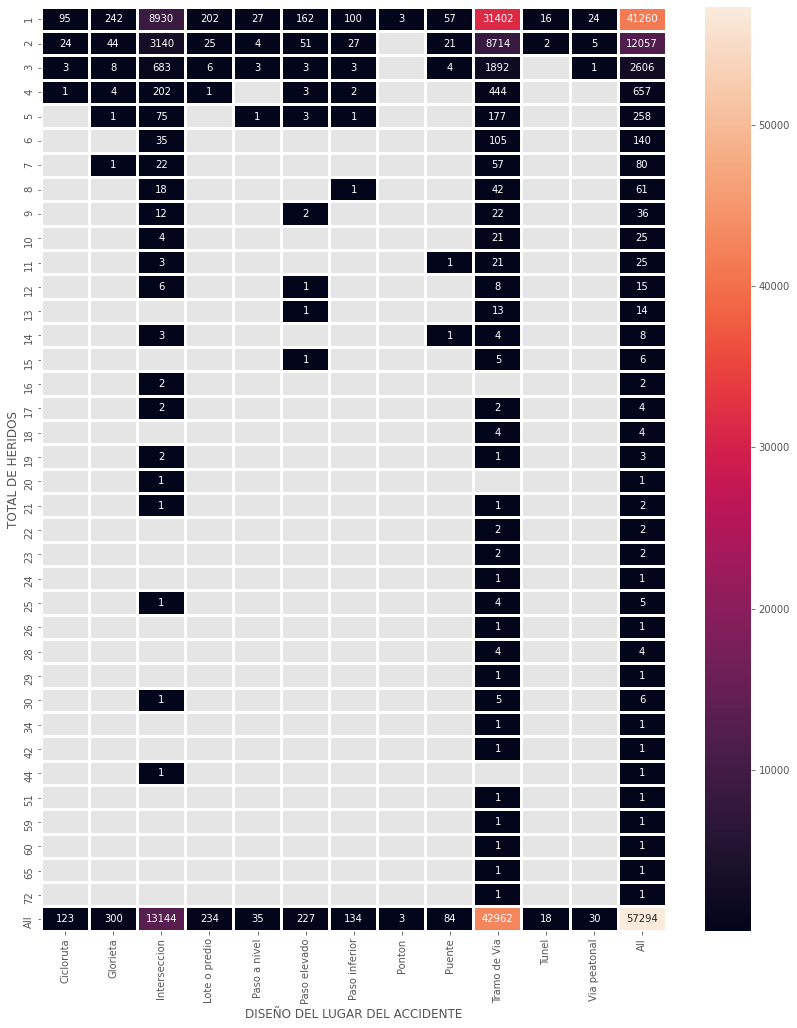

In [ ]:
fig, ax = plt.subplots(figsize=(14, 17))
mask = heridos_diseno_lugar == 0
sns.heatmap(heridos_diseno_lugar, fmt='d',ax=ax, mask=mask, annot=True, linewidths=2);
ax.set_ylabel('TOTAL DE HERIDOS')
ax.set_xlabel('DISEÑO DEL LUGAR DEL ACCIDENTE');

De acuerdo a los datos anteriormente calculados e interpretando las gráficas de calor, podemos concluir que los lugares más peligrosos teniendo en cuenta la cantidad de accidentes que en estos sitios ocurren son los Tramos de Vía, en donde un 83.21% de las personas mueren y un total de 42962 personas resultaron heridas a lo largo de los 5 años. En el siguiente lugar encontramos a las intersecciones, en donde el 14.1% de personas mueren y 13144 resultaron heridas.

In [ ]:
heridos_por_localidad = pd.crosstab(actores_heridos['TOTAL_HERIDOS'], actores_heridos['LOCALIDAD'], margins=True)
heridos_por_localidad

LOCALIDAD,Antonio Nariño,Barrios Unidos,Bosa,Chapinero,Ciudad Bolívar,Engativá,Fontibón,Kennedy,La Candelaria,Los Mártires,Puente Aranda,Rafael Uribe Uribe,San Cristóbal,Santa Fe,Suba,Sumapaz,Teusaquillo,Tunjuelito,Usaquén,Usme,All
TOTAL_HERIDOS,,,,,,,,,,,,,,,,,,,,,
1,1044,1755,2581,1728,2176,3999,2428,5587,212,1484,2905,1572,1692,1444,3527,0,1816,1443,2716,1151,41260
2,317,513,825,421,691,1083,694,1729,54,430,903,467,513,342,1119,1,516,465,652,322,12057
3,80,115,212,94,161,216,141,334,18,103,188,98,99,74,219,1,123,110,146,74,2606
4,14,31,47,24,42,51,28,83,3,25,49,24,31,11,59,0,26,26,52,31,657
5,9,15,13,11,11,16,13,36,1,9,18,12,11,9,21,0,16,12,21,4,258
6,8,5,8,6,11,17,5,17,0,4,7,6,7,3,14,0,7,3,6,6,140
7,2,2,3,3,5,7,7,6,0,8,7,1,5,3,4,0,4,7,5,1,80
8,0,3,5,3,7,4,3,4,0,3,3,3,3,0,5,0,3,3,5,4,61
9,0,2,2,3,8,1,1,3,0,1,1,1,2,0,4,0,2,5,0,0,36


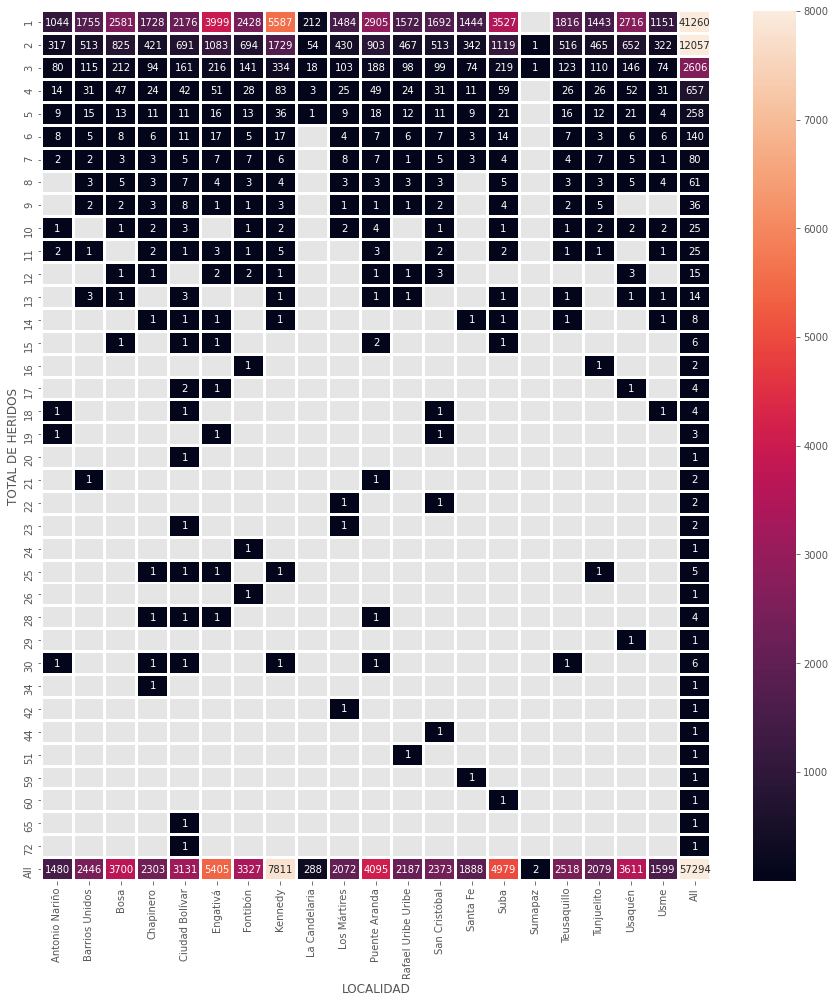

In [ ]:
fig, ax = plt.subplots(figsize=(15, 16))
mask = heridos_por_localidad == 0
sns.heatmap(heridos_por_localidad, fmt='d',ax=ax, mask=mask, annot=True, linewidths=2, vmax=8000)
ax.set_ylabel('TOTAL DE HERIDOS')
ax.set_xlabel('LOCALIDAD');

In [ ]:
muertos_por_localidad = pd.crosstab(actores_muertos['TOTAL_MUERTOS'], actores_muertos['LOCALIDAD'], margins=True, normalize=True)
muertos_por_localidad

LOCALIDAD,Antonio Nariño,Barrios Unidos,Bosa,Chapinero,Ciudad Bolívar,Engativá,Fontibón,Kennedy,La Candelaria,Los Mártires,Puente Aranda,Rafael Uribe Uribe,San Cristóbal,Santa Fe,Suba,Sumapaz,Teusaquillo,Tunjuelito,Usaquén,Usme,All
TOTAL_MUERTOS,,,,,,,,,,,,,,,,,,,,,
1,0.027863,0.033588,0.062977,0.028244,0.070229,0.08855,0.068702,0.137405,0.004198,0.032824,0.070229,0.039695,0.040458,0.027099,0.078244,0.000763,0.032443,0.040076,0.051145,0.039313,0.974046
2,0.000382,0.001908,0.001145,0.000382,0.001908,0.00229,0.001908,0.001527,0.000000,0.000382,0.001908,0.001908,0.000763,0.000763,0.001527,0.000000,0.001908,0.001145,0.000382,0.001908,0.024046
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000382,0.000000,0.000382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000382,0.000000,0.001145
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000382,0.000000,0.000000,0.000382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000763
All,0.028244,0.035496,0.064122,0.028626,0.072137,0.09084,0.070611,0.139313,0.004198,0.033588,0.072519,0.041603,0.041221,0.028244,0.079771,0.000763,0.034351,0.041221,0.051908,0.041221,1.000000


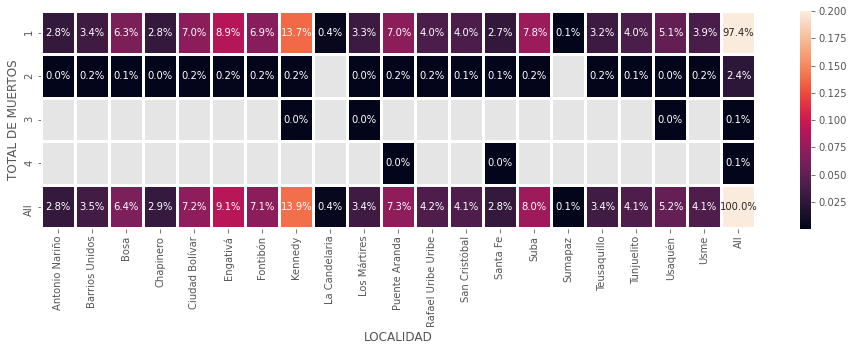

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4))
mask = muertos_por_localidad == 0
sns.heatmap(muertos_por_localidad, fmt='.1%',ax=ax, mask=mask, annot=True, linewidths=2, vmax=0.2)
ax.set_ylabel('TOTAL DE MUERTOS')
ax.set_xlabel('LOCALIDAD');

Según los datos calculados e interpretando la gráfica, nos podemos dar cuenta que la localida de Bogotá más peligrosa es Kennedy, en donde se concentra el 13.9% del total de muertos y un total de 7811 heridos a lo largo de los 5 años, seguida por Engativá con con 9.1% y 5045 heridos y por último Subá con el 8% de muertes y 4979 en número de heridos.

Algo que se debe notar y que no debe pasar por alto, es la localidad de Ciudad Bolivar, donde se presentaron los accidentes con la mayor cantidad de heridos. Un accidente de tránsito dejó 72 heridos y otro más 65.

### **Vehículos más peligrosos y naturaleza de los mismos**

### **Dataframe `df_vehiculos`**

Por último, vamos a realizar un estudio teniendo en cuenta los vehiculos implicados en accidentes. Primero usamos una tabla de contenigencia para realizar un conteo por clase de vehiculo y el servicio para el cual el vehículo es usado. 

In [ ]:
pd.crosstab(df_vehiculos['CLASE'], df_vehiculos['SERVICIO'], margins=True)

SERVICIO,Diplomatico,Oficial,Particular,Publico,All
CLASE,,,,,
Automovil,35,3170,93827,39688,136720
Bicicleta,0,4,1,0,5
Bus,1,112,412,33681,34206
Buseta,1,57,100,4869,5027
"Camion, Furgon",0,551,2280,15117,17948
Camioneta,31,1912,25061,18246,45250
Campero,13,1137,12257,942,14349
Cuatrimoto,0,0,1,2,3
Microbus,0,93,346,9107,9546


Los datos anteriores nos permite concluir que los automoviles, las camionetas y las motocicletas son los 3 vehiculos donde más se presentan accidentes, es decir, la mayoría de las veces en las que sucede un accidente de tránsito, están implicados estas tres clases de vehiculos. Tambien, los medios de transporte de caracter Público son los mas accidentados, exceptuando algunos vehiculos poco comunes como las Cuatrimotos, Motocarros y Motocilo.

In [ ]:
porcentaje_por_vehiculos = pd.crosstab(df_vehiculos['CLASE'], df_vehiculos['SERVICIO'], margins=True, normalize='index')
porcentaje_por_vehiculos

SERVICIO,Diplomatico,Oficial,Particular,Publico
CLASE,,,,
Automovil,0.000256,0.023186,0.686271,0.290287
Bicicleta,0.000000,0.800000,0.200000,0.000000
Bus,0.000029,0.003274,0.012045,0.984652
Buseta,0.000199,0.011339,0.019893,0.968570
"Camion, Furgon",0.000000,0.030700,0.127034,0.842267
Camioneta,0.000685,0.042254,0.553834,0.403227
Campero,0.000906,0.079239,0.854206,0.065649
Cuatrimoto,0.000000,0.000000,0.333333,0.666667
Microbus,0.000000,0.009742,0.036246,0.954012


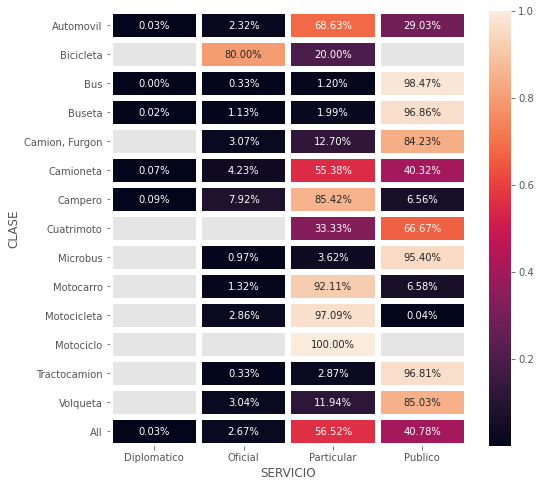

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
mask = porcentaje_por_vehiculos == 0
sns.heatmap(porcentaje_por_vehiculos, linewidths=5, fmt='.2%', annot=True, mask=mask, ax=ax);

# **FASE 4: Evaluación de resultados y cumplimiento de objetivos**

Luego de realizar los análisis de datos vistos anteriormente, tenemos herramientas suficientes para la toma de desiciones por parte del ministerior de transporte. Hay que enfocarse en programas de concientización que vayan dirigidos a Hombres en su mayoria, con un promedio de edad de 36 años, puesto que son estas personas las que se han visto implicadas a lo largo de los años en accidentes de tránsito. 

Es importante también revisar las interescciones viales y los tramos de vía de la ciudad, en especial las localidades de Kennedy, Suba y Engativa. Ya que en estos tipos de lugares y localidades, se concetra alta peligrosidad en cuanto a numero de accidentes.

Aparte, tambien se descubrio que los autos, motocicletas y camionetas son las que mas se ven involucradas en accidentes de tránsito. Un target interesante para realizar campañas de concientización serían aquellos hombres con un promedio de edad de 36 años, cuyo vehiculo sea auto, moto o camioneta. Ya que es en ese foco, donde se puede atacar el problema de raiz con el objetivo de minimizar el número de accidentes.